DATA608 Project 4: Do Bigger Job Markets Pay More?

Farhod Ibragimov.

## Introduction

I looked at how salaries and job counts changed for data-related roles across the United States between 2021 and 2024.
The dataset comes from the U.S. Bureau of Labor Statistics (BLS) and includes jobs like
 * Data Scientist
 * Statistician
 * Operations Research Analyst 
 * Database Administrator 
 * Database Architect
 * Computer & Information Research Scientist.

The big question for me was simple but tricky:

* “Do states with more data jobs actually pay more, or do they just hire more people at lower pay?”

At first we would assume bigger markets equal to higher salaries. But the more I looked, the less that held up. The truth seems more mixed — pay doesn’t just follow headcount. Some states with huge data demand actually sit below the national median, while smaller research-heavy states quietly lead in wages. So, maybe the “hot” job markets aren’t not the best places to look for jobs as they look.

## Part 1. EDA
In this section i did data preparation and analysis. I wouldn't go into details of EDA, since this project focused on data visualisation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
jobs24_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2024_dl.xlsx")
jobs23_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2023_dl.xlsx")
jobs22_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2022_dl.xlsx")
jobs21_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2021_dl.xlsx")
jobs20_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2020_dl.xlsx")

# jobs24_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm24st\state_M2024_dl.xlsx")
# jobs23_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm23st\state_M2023_dl.xlsx")
# jobs22_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm22st\state_M2022_dl.xlsx")
# jobs21_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm21st\state_M2021_dl.xlsx")
# jobs20_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm21st\state_M2020_dl.xlsx")

In [ ]:
jobs24_df.info()
jobs24_df.head()

In [57]:
jobs23_df.info()
jobs23_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37676 entries, 0 to 37675
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          37676 non-null  int64  
 1   AREA_TITLE    37676 non-null  object 
 2   AREA_TYPE     37676 non-null  int64  
 3   PRIM_STATE    37676 non-null  object 
 4   NAICS         37676 non-null  int64  
 5   NAICS_TITLE   37676 non-null  object 
 6   I_GROUP       37676 non-null  object 
 7   OWN_CODE      37676 non-null  int64  
 8   OCC_CODE      37676 non-null  object 
 9   OCC_TITLE     37676 non-null  object 
 10  O_GROUP       37676 non-null  object 
 11  TOT_EMP       37676 non-null  object 
 12  EMP_PRSE      37676 non-null  object 
 13  JOBS_1000     37676 non-null  object 
 14  LOC_QUOTIENT  37676 non-null  object 
 15  PCT_TOTAL     0 non-null      float64
 16  PCT_RPT       0 non-null      float64
 17  H_MEAN        37676 non-null  object 
 18  A_MEAN        37676 non-nu

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PCT_RPT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,2053090,0,1000,1,NaN,NaN,25.67,53400,0.2,10.87,14.22,19.88,30.09,46.18,22620,29580,41350,62580,96050,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,105580,0.8,51.424,0.74,NaN,NaN,56.21,116920,0.5,24.38,35.18,47.95,67.22,95.44,50710,73180,99740,139810,198520,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,720,6.8,0.348,0.25,NaN,NaN,106.26,221030,5.8,31.59,59.6,79.48,102.01,#,65700,123960,165320,212180,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,34450,2.7,16.781,0.73,NaN,NaN,62.17,129310,1.1,23.11,34.74,49.67,78.25,112.54,48080,72260,103320,162760,234080,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,detailed,1140,9.1,0.555,2.6,NaN,NaN,*,33690,5.1,*,*,*,*,*,18320,19670,24470,45050,55070,True,NaN


In [58]:
jobs22_df.info()
jobs22_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37569 entries, 0 to 37568
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          37569 non-null  int64  
 1   AREA_TITLE    37569 non-null  object 
 2   AREA_TYPE     37569 non-null  int64  
 3   PRIM_STATE    37569 non-null  object 
 4   NAICS         37569 non-null  int64  
 5   NAICS_TITLE   37569 non-null  object 
 6   I_GROUP       37569 non-null  object 
 7   OWN_CODE      37569 non-null  int64  
 8   OCC_CODE      37569 non-null  object 
 9   OCC_TITLE     37569 non-null  object 
 10  O_GROUP       37569 non-null  object 
 11  TOT_EMP       37569 non-null  object 
 12  EMP_PRSE      37569 non-null  object 
 13  JOBS_1000     37569 non-null  object 
 14  LOC_QUOTIENT  37569 non-null  object 
 15  PCT_TOTAL     0 non-null      float64
 16  PCT_RPT       0 non-null      float64
 17  H_MEAN        37569 non-null  object 
 18  A_MEAN        37569 non-nu

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PCT_RPT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,2004000,0,1000,1,NaN,NaN,24.34,50620,0.2,10.38,13.48,18.5,28.94,43.25,21580,28030,38470,60190,89950,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,104280,1,52.034,0.78,NaN,NaN,53.13,110500,0.8,22.92,31.83,46.12,63.53,86.89,47680,66210,95940,132150,180730,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,710,13.4,0.355,0.26,NaN,NaN,91.67,190680,4.6,24.48,52.15,65.83,90.64,#,50920,108470,136930,188530,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,36550,2.7,18.239,0.8,NaN,NaN,58,120640,1.9,21.41,31.39,47.17,71.64,105.19,44530,65280,98120,149010,218800,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,detailed,930,8.4,0.464,1.6,NaN,NaN,*,30000,3.2,*,*,*,*,*,17080,18130,20320,35730,57060,True,NaN


In [59]:
jobs21_df.info()
jobs21_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37580 entries, 0 to 37579
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          37580 non-null  int64  
 1   AREA_TITLE    37580 non-null  object 
 2   AREA_TYPE     37580 non-null  int64  
 3   PRIM_STATE    37580 non-null  object 
 4   NAICS         37580 non-null  int64  
 5   NAICS_TITLE   37580 non-null  object 
 6   I_GROUP       37580 non-null  object 
 7   OWN_CODE      37580 non-null  int64  
 8   OCC_CODE      37580 non-null  object 
 9   OCC_TITLE     37580 non-null  object 
 10  O_GROUP       37580 non-null  object 
 11  TOT_EMP       37580 non-null  object 
 12  EMP_PRSE      37580 non-null  object 
 13  JOBS_1000     37580 non-null  object 
 14  LOC_QUOTIENT  37580 non-null  object 
 15  PCT_TOTAL     0 non-null      float64
 16  PCT_RPT       0 non-null      float64
 17  H_MEAN        37580 non-null  object 
 18  A_MEAN        37580 non-nu

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PCT_RPT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,1928110,0,1000,1,NaN,NaN,23.13,48110,0.2,8.96,11.89,17.91,28.68,39.79,18630,24720,37250,59660,82760,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,96070,1.3,49.827,0.79,NaN,NaN,51.06,106210,0.6,22.55,30.19,45.51,61.25,87.58,46900,62790,94650,127400,182160,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,690,11.4,0.359,0.25,NaN,NaN,72.24,150260,4.8,28.46,45.36,61.14,82.09,#,59190,94360,127170,170750,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,34370,2.7,17.824,0.84,NaN,NaN,54.5,113350,0.9,22.22,29.93,46.28,68.75,#,46220,62260,96270,143000,#,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,detailed,1030,10,0.535,1.69,NaN,NaN,*,28520,4.5,*,*,*,*,*,16930,17310,17840,31300,56420,True,NaN


In [60]:
jobs20_df.info()
jobs20_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36085 entries, 0 to 36084
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          36085 non-null  int64  
 1   AREA_TITLE    36085 non-null  object 
 2   AREA_TYPE     36085 non-null  int64  
 3   PRIM_STATE    36085 non-null  object 
 4   NAICS         36085 non-null  int64  
 5   NAICS_TITLE   36085 non-null  object 
 6   I_GROUP       36085 non-null  object 
 7   OWN_CODE      36085 non-null  int64  
 8   OCC_CODE      36085 non-null  object 
 9   OCC_TITLE     36085 non-null  object 
 10  O_GROUP       36085 non-null  object 
 11  TOT_EMP       36085 non-null  object 
 12  EMP_PRSE      36085 non-null  object 
 13  JOBS_1000     36085 non-null  object 
 14  LOC_QUOTIENT  36085 non-null  object 
 15  PCT_TOTAL     0 non-null      float64
 16  H_MEAN        36085 non-null  object 
 17  A_MEAN        36085 non-null  object 
 18  MEAN_PRSE     36085 non-nu

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,1903210,0.5,1000,1,NaN,22.52,46840,0.6,8.98,11.57,17.43,27.39,41.07,18690,24060,36250,56980,85430,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,87110,1.2,45.772,0.8,NaN,52.9,110040,0.7,22.95,32.37,45.73,64.58,91.89,47740,67330,95120,134320,191130,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,1160,8.9,0.608,0.42,NaN,84.09,174910,3.8,23.79,47.08,77.55,#,#,49480,97930,161290,#,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,31170,2,16.377,0.97,NaN,58.56,121800,1,23.09,32.57,48.64,73.58,#,48030,67740,101170,153050,#,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,detailed,1150,6.7,0.604,1.64,NaN,*,28840,5.1,*,*,*,*,*,16220,17190,18820,27920,55970,True,NaN


In [61]:
def select_occ_codes(df, occ_codes = ['15-2051', '15-2041', '15-2051.01', 
                                      '15-2041', '15-2031', '15-1242', 
                                      '15-1243', '15-1211', '15-1221',
                                      '15-2099', '', '', '', '']):
    selected_jobs_df = df[df['OCC_CODE'].isin(occ_codes)]
    selected_jobs_df = selected_jobs_df[['AREA', 'AREA_TITLE',	'AREA_TYPE', 'PRIM_STATE',
                                         'NAICS','NAICS_TITLE','I_GROUP',	'OWN_CODE',	
                                         'OCC_CODE',	'OCC_TITLE','O_GROUP',	'TOT_EMP', 
                                         'JOBS_1000', 'H_MEAN','A_MEAN']]
    cols = ['AREA', 'AREA_TYPE', 'TOT_EMP', 'JOBS_1000', 'H_MEAN','A_MEAN']

    for col in cols:
        selected_jobs_df[col] = pd.to_numeric(selected_jobs_df[col], errors='coerce').astype('float')
    selected_jobs_df.columns = selected_jobs_df.columns.str.lower()
    return selected_jobs_df






In [62]:
data_jobs24_df = select_occ_codes(jobs24_df)
data_jobs23_df = select_occ_codes(jobs23_df)
data_jobs22_df = select_occ_codes(jobs22_df)
data_jobs21_df = select_occ_codes(jobs21_df)
data_jobs20_df = select_occ_codes(jobs20_df)

data_jobs24_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 68 to 37450
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         366 non-null    float64
 1   area_title   366 non-null    object 
 2   area_type    366 non-null    float64
 3   prim_state   366 non-null    object 
 4   naics        366 non-null    int64  
 5   naics_title  366 non-null    object 
 6   i_group      366 non-null    object 
 7   own_code     366 non-null    int64  
 8   occ_code     366 non-null    object 
 9   occ_title    366 non-null    object 
 10  o_group      366 non-null    object 
 11  tot_emp      354 non-null    float64
 12  jobs_1000    354 non-null    float64
 13  h_mean       361 non-null    float64
 14  a_mean       361 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 45.8+ KB


In [63]:
data_jobs24_df.occ_code.value_counts()

occ_code
15-1211    53
15-1242    52
15-2051    52
15-1243    51
15-2031    50
15-2041    48
15-1221    40
15-2099    20
Name: count, dtype: int64

In [64]:
data_jobs24_df.head()

,area,area_title,area_type,prim_state,naics,naics_title,i_group,own_code,occ_code,occ_title,o_group,tot_emp,jobs_1000,h_mean,a_mean
68,1.0,Alabama,2.0,AL,0,Cross-industry,cross-industry,1235,15-1211,Computer Systems Analysts,detailed,6830.0,3.268,54.06,112430.0
70,1.0,Alabama,2.0,AL,0,Cross-industry,cross-industry,1235,15-1221,Computer and Information Research Scientists,detailed,540.0,0.258,52.41,109020.0
74,1.0,Alabama,2.0,AL,0,Cross-industry,cross-industry,1235,15-1242,Database Administrators,detailed,1990.0,0.953,44.68,92930.0
75,1.0,Alabama,2.0,AL,0,Cross-industry,cross-industry,1235,15-1243,Database Architects,detailed,310.0,0.147,56.50,117510.0
84,1.0,Alabama,2.0,AL,0,Cross-industry,cross-industry,1235,15-2031,Operations Research Analysts,detailed,500.0,0.241,56.91,118370.0


In [65]:
def rename_cols(df, year):
    df = df[['area', 'area_title','prim_state', 'occ_code', 'occ_title', 'o_group', 'tot_emp','jobs_1000',	'h_mean',	'a_mean']]
    df  = df.rename(columns={'tot_emp':f'tot_emp_{year}',
                            'jobs_1000':f'jobs_1000_{year}',
                                'h_mean':f'h_mean_{year}',
                                'a_mean':f'a_mean_{year}'})
    return df

data_jobs24_df = rename_cols(data_jobs24_df, 24)
display(data_jobs24_df)

,area,area_title,prim_state,occ_code,occ_title,o_group,tot_emp_24,jobs_1000_24,h_mean_24,a_mean_24
68,1.0,Alabama,AL,15-1211,Computer Systems Analysts,detailed,6830.0,3.268,54.06,112430.0
70,1.0,Alabama,AL,15-1221,Computer and Information Research Scientists,detailed,540.0,0.258,52.41,109020.0
74,1.0,Alabama,AL,15-1242,Database Administrators,detailed,1990.0,0.953,44.68,92930.0
75,1.0,Alabama,AL,15-1243,Database Architects,detailed,310.0,0.147,56.50,117510.0
84,1.0,Alabama,AL,15-2031,Operations Research Analysts,detailed,500.0,0.241,56.91,118370.0
...,...,...,...,...,...,...,...,...,...,...
36902,72.0,Puerto Rico,PR,15-1243,Database Architects,detailed,80.0,0.088,37.58,78160.0
36911,72.0,Puerto Rico,PR,15-2031,Operations Research Analysts,detailed,60.0,0.061,33.19,69040.0
36912,72.0,Puerto Rico,PR,15-2041,Statisticians,detailed,380.0,0.405,23.71,49310.0
36913,72.0,Puerto Rico,PR,15-2051,Data Scientists,detailed,120.0,0.122,34.79,72370.0


In [66]:
data_jobs20_df = rename_cols(data_jobs20_df, 20)
data_jobs21_df = rename_cols(data_jobs21_df, 21)
data_jobs22_df = rename_cols(data_jobs22_df, 22)
data_jobs23_df = rename_cols(data_jobs23_df, 23)


In [67]:
data_jobs24_df.head()

,area,area_title,prim_state,occ_code,occ_title,o_group,tot_emp_24,jobs_1000_24,h_mean_24,a_mean_24
68,1.0,Alabama,AL,15-1211,Computer Systems Analysts,detailed,6830.0,3.268,54.06,112430.0
70,1.0,Alabama,AL,15-1221,Computer and Information Research Scientists,detailed,540.0,0.258,52.41,109020.0
74,1.0,Alabama,AL,15-1242,Database Administrators,detailed,1990.0,0.953,44.68,92930.0
75,1.0,Alabama,AL,15-1243,Database Architects,detailed,310.0,0.147,56.50,117510.0
84,1.0,Alabama,AL,15-2031,Operations Research Analysts,detailed,500.0,0.241,56.91,118370.0


In [68]:
data_jobs_merged_df = (
    data_jobs20_df
    .merge(data_jobs21_df, how='outer')
    .merge(data_jobs22_df, how='outer')
    .merge(data_jobs23_df, how='outer')
    .merge(data_jobs24_df, how='outer')
)
display(data_jobs_merged_df)
 

,area,area_title,prim_state,occ_code,occ_title,o_group,tot_emp_20,jobs_1000_20,h_mean_20,a_mean_20,tot_emp_21,jobs_1000_21,h_mean_21,a_mean_21,tot_emp_22,jobs_1000_22,h_mean_22,a_mean_22,tot_emp_23,jobs_1000_23,h_mean_23,a_mean_23,tot_emp_24,jobs_1000_24,h_mean_24,a_mean_24
0,1.0,Alabama,AL,15-1211,Computer Systems Analysts,detailed,4900.0,2.574,44.97,93530.0,4360.0,2.261,49.56,103080.0,4880.0,2.436,52.43,109060.0,5950.0,2.897,52.18,108520.0,6830.0,3.268,54.06,112430.0
1,1.0,Alabama,AL,15-1221,Computer and Information Research Scientists,detailed,380.0,0.201,60.84,126550.0,210.0,0.108,56.92,118390.0,NaN,NaN,48.65,101190.0,480.0,0.235,50.66,105360.0,540.0,0.258,52.41,109020.0
2,1.0,Alabama,AL,15-1242,Database Administrators,detailed,NaN,NaN,NaN,NaN,2210.0,1.149,39.78,82730.0,1740.0,0.868,41.87,87090.0,1550.0,0.756,43.03,89510.0,1990.0,0.953,44.68,92930.0
3,1.0,Alabama,AL,15-1243,Database Architects,detailed,NaN,NaN,NaN,NaN,360.0,0.186,59.50,123770.0,310.0,0.156,57.50,119590.0,310.0,0.149,55.00,114400.0,310.0,0.147,56.50,117510.0
4,1.0,Alabama,AL,15-2031,Operations Research Analysts,detailed,560.0,0.292,49.09,102100.0,550.0,0.285,50.53,105110.0,510.0,0.257,52.48,109160.0,570.0,0.280,54.04,112400.0,500.0,0.241,56.91,118370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72.0,Puerto Rico,PR,15-1243,Database Architects,detailed,NaN,NaN,NaN,NaN,40.0,0.052,35.80,74470.0,70.0,0.073,33.66,70010.0,100.0,0.104,35.38,73590.0,80.0,0.088,37.58,78160.0
379,72.0,Puerto Rico,PR,15-2031,Operations Research Analysts,detailed,40.0,0.044,34.74,72250.0,NaN,NaN,NaN,NaN,30.0,0.037,34.91,72620.0,NaN,NaN,29.89,62160.0,60.0,0.061,33.19,69040.0
380,72.0,Puerto Rico,PR,15-2041,Statisticians,detailed,210.0,0.259,17.92,37260.0,300.0,0.356,19.54,40640.0,250.0,0.283,20.20,42020.0,240.0,0.255,20.98,43640.0,380.0,0.405,23.71,49310.0
381,72.0,Puerto Rico,PR,15-2051,Data Scientists,detailed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,0.081,31.21,64910.0,90.0,0.097,34.65,72070.0,120.0,0.122,34.79,72370.0


In [69]:
data_jobs_merged_df.to_csv('data_jobs_merged_df.csv', index='False')
data_jobs_merged_df.info()
data_jobs_merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          383 non-null    float64
 1   area_title    383 non-null    object 
 2   prim_state    383 non-null    object 
 3   occ_code      383 non-null    object 
 4   occ_title     383 non-null    object 
 5   o_group       383 non-null    object 
 6   tot_emp_20    192 non-null    float64
 7   jobs_1000_20  192 non-null    float64
 8   h_mean_20     189 non-null    float64
 9   a_mean_20     189 non-null    float64
 10  tot_emp_21    351 non-null    float64
 11  jobs_1000_21  351 non-null    float64
 12  h_mean_21     353 non-null    float64
 13  a_mean_21     353 non-null    float64
 14  tot_emp_22    348 non-null    float64
 15  jobs_1000_22  348 non-null    float64
 16  h_mean_22     353 non-null    float64
 17  a_mean_22     353 non-null    float64
 18  tot_emp_23    359 non-null    

,area,area_title,prim_state,occ_code,occ_title,o_group,tot_emp_20,jobs_1000_20,h_mean_20,a_mean_20,tot_emp_21,jobs_1000_21,h_mean_21,a_mean_21,tot_emp_22,jobs_1000_22,h_mean_22,a_mean_22,tot_emp_23,jobs_1000_23,h_mean_23,a_mean_23,tot_emp_24,jobs_1000_24,h_mean_24,a_mean_24
0,1.0,Alabama,AL,15-1211,Computer Systems Analysts,detailed,4900.0,2.574,44.97,93530.0,4360.0,2.261,49.56,103080.0,4880.0,2.436,52.43,109060.0,5950.0,2.897,52.18,108520.0,6830.0,3.268,54.06,112430.0
1,1.0,Alabama,AL,15-1221,Computer and Information Research Scientists,detailed,380.0,0.201,60.84,126550.0,210.0,0.108,56.92,118390.0,NaN,NaN,48.65,101190.0,480.0,0.235,50.66,105360.0,540.0,0.258,52.41,109020.0
2,1.0,Alabama,AL,15-1242,Database Administrators,detailed,NaN,NaN,NaN,NaN,2210.0,1.149,39.78,82730.0,1740.0,0.868,41.87,87090.0,1550.0,0.756,43.03,89510.0,1990.0,0.953,44.68,92930.0
3,1.0,Alabama,AL,15-1243,Database Architects,detailed,NaN,NaN,NaN,NaN,360.0,0.186,59.50,123770.0,310.0,0.156,57.50,119590.0,310.0,0.149,55.00,114400.0,310.0,0.147,56.50,117510.0
4,1.0,Alabama,AL,15-2031,Operations Research Analysts,detailed,560.0,0.292,49.09,102100.0,550.0,0.285,50.53,105110.0,510.0,0.257,52.48,109160.0,570.0,0.280,54.04,112400.0,500.0,0.241,56.91,118370.0


In [70]:
data_jobs_merged_df.isna().sum()
data_jobs_merged_df = data_jobs_merged_df[~data_jobs_merged_df['occ_title'].isin(['Computer Systems Analysts', 'Mathematical Science Occupations, All Other', 'Computer and Information Research Scientists'])]
data_jobs_merged_df.occ_title.unique()

array(['Database Administrators', 'Database Architects',
       'Operations Research Analysts', 'Statisticians', 'Data Scientists'],
      dtype=object)

In [71]:
df_count = data_jobs_merged_df.groupby('area_title')['occ_title'].count()
df_count.head()

area_title
Alabama       5
Alaska        5
Arizona       5
Arkansas      5
California    5
Name: occ_title, dtype: int64

In [72]:
occ_values = data_jobs_merged_df['occ_title'].unique()
#print(occ_values)

def get_title_mean_salary(df):
    mean_salaries = []
    
    for title in occ_values:
        title_db = df[df['occ_title'] == title]
        salary_mean_cols = title_db.filter(like='a_mean')
        dba_mean = salary_mean_cols.mean(axis=0)
        dba_mean['occ_title'] = title

        mean_salaries.append(dba_mean)

    mean_salaries = pd.DataFrame(mean_salaries).set_index('occ_title').round(2)
    return mean_salaries

mean_salaries = get_title_mean_salary(data_jobs_merged_df)
#display(data_scientists_db)

mean_salaries = mean_salaries.reset_index(drop=False)
display(mean_salaries)
mean_salaries.info()

,occ_title,a_mean_20,a_mean_21,a_mean_22,a_mean_23,a_mean_24
0,Database Administrators,NaN,90149.23,95223.73,97760.77,99210.96
1,Database Architects,NaN,111584.58,121681.49,126080.00,130272.29
2,Operations Research Analysts,85588.60,85422.55,87358.63,90896.40,94032.40
3,Statisticians,86784.47,88477.45,92629.57,96014.80,98981.25
4,Data Scientists,NaN,97807.55,102146.40,109313.08,110152.55


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   occ_title  5 non-null      object 
 1   a_mean_20  2 non-null      float64
 2   a_mean_21  5 non-null      float64
 3   a_mean_22  5 non-null      float64
 4   a_mean_23  5 non-null      float64
 5   a_mean_24  5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 372.0+ bytes


In [112]:
mean_salaries_melted = mean_salaries.melt(id_vars='occ_title', var_name='year', value_name='salary')
mean_salaries_melted['year'] = mean_salaries_melted['year'].str.extract('(\d+)$').astype(int)
mean_salaries_melted['year'] = mean_salaries_melted['year'] + 2000
mean_salaries_melted  = mean_salaries_melted[mean_salaries_melted['year'] != 2020]
mean_salaries_melted.head()

,occ_title,year,salary
5,Database Administrators,2021,90149.23
6,Database Architects,2021,111584.58
7,Operations Research Analysts,2021,85422.55
8,Statisticians,2021,88477.45
9,Data Scientists,2021,97807.55


In [74]:
def get_title_jobs_totals(df):
    total_jobs = []

    for title in occ_values:
        title_df =  df[df['occ_title'] == title]
        jobs_cols_df = title_df.filter(like='tot_emp')
        jobs_totals = jobs_cols_df.sum(axis=0)
        jobs_totals['occ_title'] = title

        total_jobs.append(jobs_totals)

    total_jobs_df = pd.DataFrame(total_jobs).set_index('occ_title')
    return total_jobs_df

totals_jobs_df = get_title_jobs_totals(data_jobs_merged_df)
display(totals_jobs_df)


,tot_emp_20,tot_emp_21,tot_emp_22,tot_emp_23,tot_emp_24
occ_title,,,,,
Database Administrators,0.0,86100.0,80590.0,76430.0,73330.0
Database Architects,0.0,50300.0,59690.0,59740.0,64430.0
Operations Research Analysts,96200.0,82150.0,105130.0,117860.0,107770.0
Statisticians,38300.0,31580.0,30510.0,29710.0,29110.0
Data Scientists,0.0,104390.0,150200.0,192450.0,234350.0


In [75]:
total_jobs_states_df = data_jobs_merged_df.groupby('area_title')[['tot_emp_20', 'tot_emp_21', 'tot_emp_22', 'tot_emp_23', 'tot_emp_24' ]].agg('sum')

#total_jobs_states_df.head()
#total_jobs_states_df.info()
total_jobs_states_df.head()

,tot_emp_20,tot_emp_21,tot_emp_22,tot_emp_23,tot_emp_24
area_title,,,,,
Alabama,770.0,3820.0,2740.0,3760.0,4620.0
Alaska,190.0,450.0,450.0,480.0,460.0
Arizona,2210.0,7020.0,8930.0,9400.0,8790.0
Arkansas,740.0,1650.0,920.0,1250.0,1540.0
California,13850.0,44050.0,53710.0,70310.0,64900.0


In [76]:
total_jobs_states_df['tot_emp_change'] = total_jobs_states_df.apply(lambda x: x['tot_emp_24'] - x['tot_emp_20'], axis=1)
total_jobs_states_df.head()

,tot_emp_20,tot_emp_21,tot_emp_22,tot_emp_23,tot_emp_24,tot_emp_change
area_title,,,,,,
Alabama,770.0,3820.0,2740.0,3760.0,4620.0,3850.0
Alaska,190.0,450.0,450.0,480.0,460.0,270.0
Arizona,2210.0,7020.0,8930.0,9400.0,8790.0,6580.0
Arkansas,740.0,1650.0,920.0,1250.0,1540.0,800.0
California,13850.0,44050.0,53710.0,70310.0,64900.0,51050.0


In [77]:

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.edgecolor'] = 'grey'
mpl.rcParams['xtick.color'] = 'grey'
mpl.rcParams['ytick.color'] = 'grey'
plt.rcParams['axes.grid'] = False
sns.set_style("white")


## Part 2. What charts show us about Data related jobs market trends?

### Salary Growth Over Time (2021–2024)

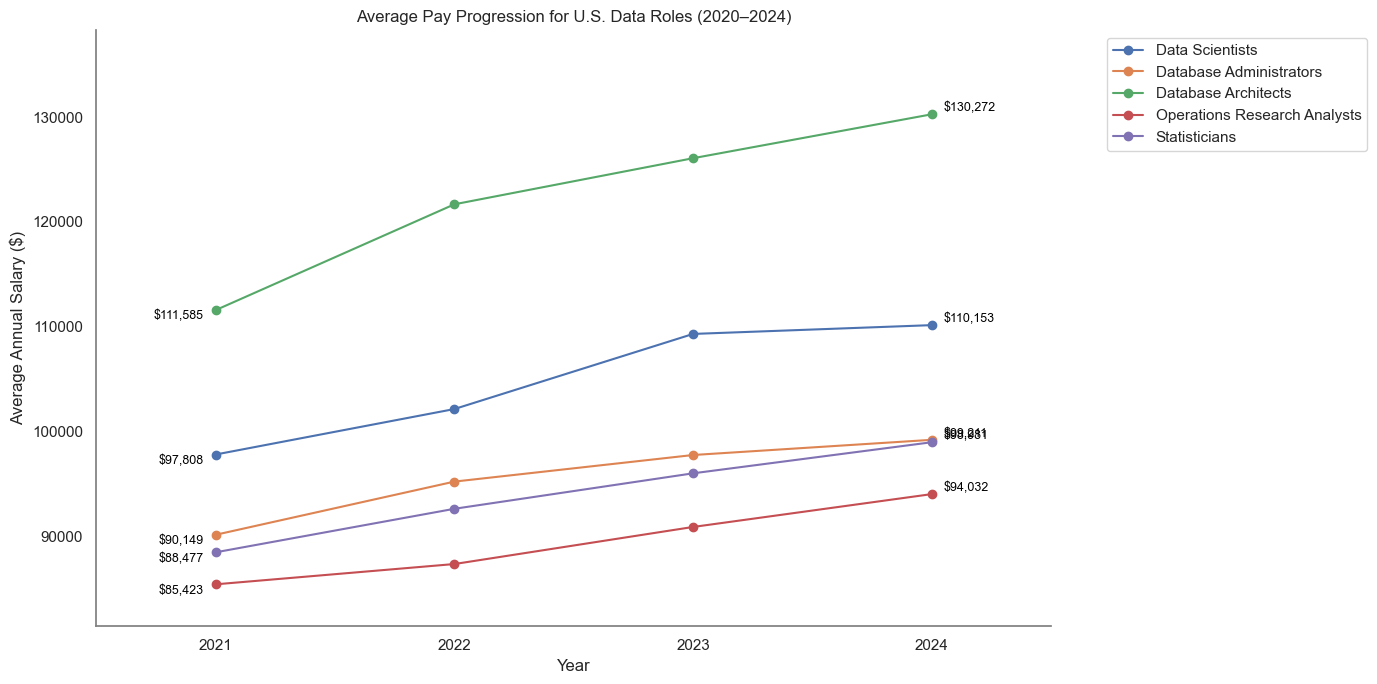

In [122]:
fig, ax = plt.subplots(figsize=(14, 7))

# --- Plot each job category ---
for name, group in mean_salaries_melted.groupby('occ_title'):
    ax.plot(group['year'], group['salary'], marker='o', label=name)

# --- Styling ---
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Pay Progression for U.S. Data Roles (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Average Annual Salary ($)')
plt.xticks(sorted(mean_salaries_melted['year'].unique().astype(int)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

# --- Add salary labels (start and end) ---
offset = 2000  # vertical offset between labels to avoid overlap
for occ in mean_salaries_melted['occ_title'].unique():
    subset = mean_salaries_melted[mean_salaries_melted['occ_title'] == occ]
    subset = subset.sort_values('year')

    # safely get start and end points
    if subset.shape[0] > 0:
        x_start, y_start = subset.iloc[0]['year'], subset.iloc[0]['salary']
        x_end, y_end = subset.iloc[-1]['year'], subset.iloc[-1]['salary']

        ax.text(x_start - 0.05, y_start - 0.1, f"${y_start:,.0f}",
                va='top', ha='right', fontsize=9, color='black')
        ax.text(x_end + 0.05, y_end + 0.1, f"${y_end:,.0f}",
                va='bottom', ha='left', fontsize=9, color='black')

# --- Add a little padding so labels don't touch axes ---
plt.xlim(mean_salaries_melted['year'].min() - 0.5, mean_salaries_melted['year'].max() + 0.5)
plt.ylim(mean_salaries_melted['salary'].min() - 4000, mean_salaries_melted['salary'].max() + 8000)

plt.tight_layout()
plt.show()


I looked at how pay evolved for each role year by year.
Each line shows the average salary from 2020 through 2024, and I labeled the starting and ending points to show how each changed.

Almost every data job saw a steady climb — Data Scientists and Database Architects led the pack, crossing well over $110K by 2024.
Statisticians rose slower but steady, while Database Administrators stayed relatively flat, maybe signaling more competition or automation.
The small year-to-year jumps reflect market maturity — not a bubble, just stable demand. 

Overall, the direction’s consistent: upward.


## Interactive Occupation View

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

df = data_jobs_merged_df.copy()
df = df[['area_title', 'prim_state', 'occ_title', 'a_mean_24', 'tot_emp_24']].dropna()


x_thr = df['tot_emp_24'].quantile(0.6)
y_thr = df['a_mean_24'].quantile(0.6)

fig = go.Figure()

occupations = df['occ_title'].unique()
color_seq = px.colors.qualitative.Set2 * 3  
symbols = ['circle', 'diamond', 'square', 'x', 'triangle-up', 'triangle-down', 'star']

for i, occ in enumerate(occupations):
    sub_df = df[df['occ_title'] == occ]
    fig.add_scatter(
        x=sub_df['tot_emp_24'],
        y=sub_df['a_mean_24'],
        mode="markers+text",  
        name=occ,
        text=None, 
        textposition="top center",
        marker=dict(
            size=9,
            color=color_seq[i % len(color_seq)],
            symbol=symbols[i % len(symbols)],
            line=dict(width=1, color="white")
        ),
        customdata=np.stack(
            (sub_df['occ_title'], sub_df['prim_state'], sub_df['a_mean_24'], sub_df['tot_emp_24']),
            axis=-1
        ),
        hovertemplate="<b>%{customdata[0]}</b><br>State: %{customdata[1]}<br>"
                      "Salary: <b>$%{customdata[2]:,.0f}</b><br>"
                      "Employment: %{customdata[3]:,.0f}<extra></extra>",
    )

dropdown_buttons = []

for i, occ in enumerate(occupations):
    visible = [j == i for j in range(len(occupations))]
    text_list = [df[df['occ_title'] == occ]['prim_state'] if j == i else None for j in range(len(occupations))]
    dropdown_buttons.append(
        dict(
            method="update",
            label=occ,
            args=[{"visible": visible, "text": text_list},
                  {"title": f"“Where’s the Best States to Work? Quadrants of Pay and Demand in {occ} position"}]
        )
    )

dropdown_buttons.insert(
    0,
    dict(
        method="update",
        label="Show All",
        args=[
            {"visible": [True] * len(occupations), "text": [None] * len(occupations)},
            {"title": "Do Bigger Job Markets Pay More? (All Occupations)"}
        ]
    )
)

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=0.995,
        y=0.77,
        xanchor="left",
        yanchor="middle",
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="lightgrey"
    )]
)


fig.add_vline(x=x_thr, line=dict(color="grey", width=1.7, dash="dot"))
fig.add_hline(y=y_thr, line=dict(color="grey", width=1.7, dash="dot"))

fig.add_annotation(xref="x domain", yref="y domain", x=0.09, y=0.97,
                   text="Low Employment / High Pay", showarrow=False, font=dict(color="grey", size=12))
fig.add_annotation(xref="x domain", yref="y domain", x=0.97, y=0.97,
                   text="High Pay / High Employment", showarrow=False, font=dict(color="grey", size=12))
fig.add_annotation(xref="x domain", yref="y domain", x=0.09, y=0.03,
                   text="Low Pay / Low Employment", showarrow=False, font=dict(color="grey", size=12))
fig.add_annotation(xref="x domain", yref="y domain", x=0.97, y=0.03,
                   text="High Employment / Low Pay", showarrow=False, font=dict(color="grey", size=12))

fig.add_annotation(
    xref="paper", yref="paper",
    x=0, y=1.03,
    text=(
        "Note: Vertical line = 60th percentile of total employment (lower vs higher demand roles); "
        "horizontal line = 60th percentile of average salary (lower vs higher pay)."
    ),
    showarrow=False,
    font=dict(size=11, color="rgba(90,90,90,0.9)", family="Arial"),
    align="center"
)

fig.update_xaxes(type="log", title="Total Employment (log scale)", showgrid=False)
fig.update_yaxes(title="Average Annual Salary ($)",showgrid=False)

fig.update_layout(
    width=1300,
    height=750,
    template="plotly_white",
    font=dict(color="grey"),
    showlegend=True,
    legend_title_text="Occupation",
    title='Mapping Data Jobs by Pay and Market Size — A Quadrant View (2024)',
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="right",
        x=1.22,
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="lightgrey",
        borderwidth=1
    ),
    margin=dict(l=40, r=200, t=80, b=60),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_color="black",
        bordercolor="lightgrey"
    )
)

fig.show()


Next, I built an interactive scatter where you can choose each occupation separately.
Once you pick one job (let's say, Data Scientist), you’ll see only those points — each labeled by state abbreviation for clarity.
When you switch to “Show All,” the map resets to compare everything at once.

The interesting part is how the chart behaves differently for each job.
For Database Administrators, demand is more scattered — pay doesn’t rise much with job volume.
But for Operations Research Analysts, it’s a tighter trend — more jobs doesn't equal to higher pay. Data Architects gets paid well above $110K in almost all states.
That suggests some roles have stronger correlation between employment scale and pay reward, while others flatten out.

The quadrant lines help us visually see this balance — a reminder that growth in headcount doesn’t guarantee higher salaries.


In [83]:
df.head()

,area_title,prim_state,occ_title,a_mean_24,tot_emp_24
2,Alabama,AL,Database Administrators,92930.0,1990.0
3,Alabama,AL,Database Architects,117510.0,310.0
4,Alabama,AL,Operations Research Analysts,118370.0,500.0
5,Alabama,AL,Statisticians,76870.0,200.0
6,Alabama,AL,Data Scientists,102970.0,1620.0


## Top 10 States by Median Data Job Salary (2024)

C:\Users\farho\AppData\Local\Temp\ipykernel_17556\2608961833.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




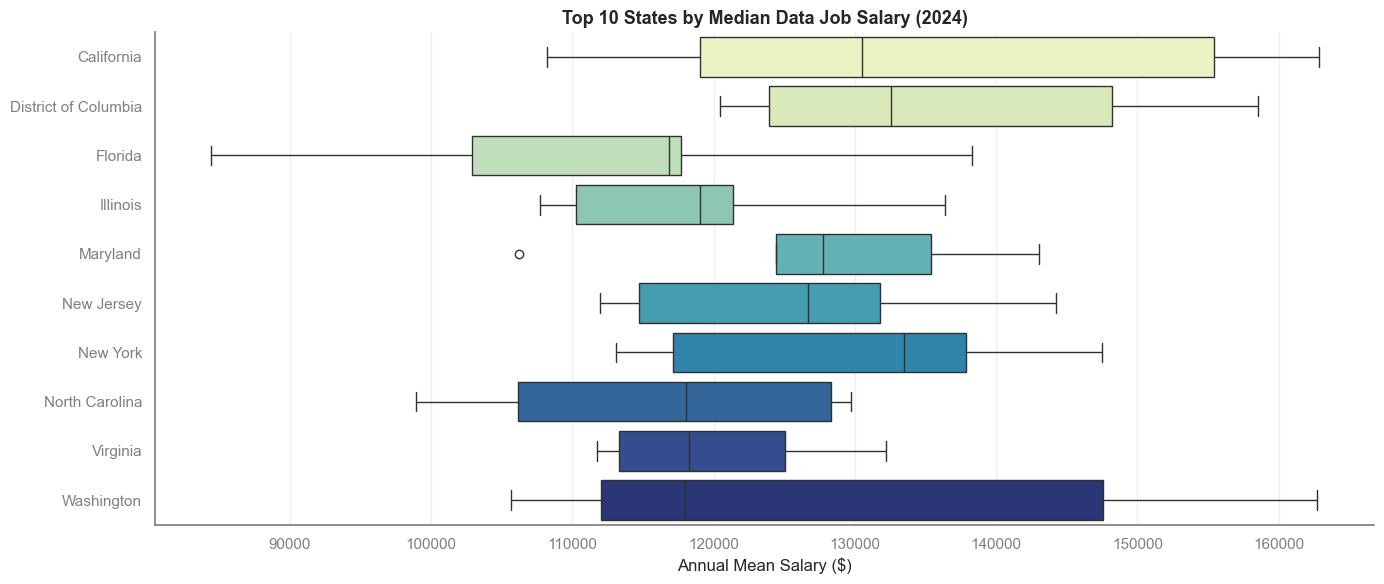

In [123]:
top_states = data_jobs_merged_df.groupby('area_title')['a_mean_24'].median().nlargest(10).index
subset = data_jobs_merged_df[data_jobs_merged_df['area_title'].isin(top_states)]

plt.figure(figsize=(14,6))
sns.boxplot(data=subset, y='area_title', x='a_mean_24',
            palette='YlGnBu', linewidth=1)
plt.title("Top 10 States by Median Data Job Salary (2024)", fontsize=13, weight='bold')
plt.xlabel("Annual Mean Salary ($)")
plt.ylabel("")
plt.grid(axis='x', alpha=0.3)
ax = plt.gca() 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.tick_params(colors='grey')
plt.tight_layout()
plt.show()


Here I looked at how much data jobs pay across the top-earning states in 2024. Each box shows the salary range (spread between lower-paid and higher-paid roles), with the line inside showing the median.

A few things stand out right away:

* California clearly dominates, both in median and range: meaning not only higher pay but also bigger spread between job levels. Probably because California’s data jobs include everything from startup analysts to senior AI engineers.

* Washington is right behind, because of tech-heavy companies located in state paying above 140K median.

* DC and Maryland pay strong too: probably because of federal data contracts and goverment research work driving those wages.

* States like Florida and North Carolina are catching up, but their spreads are tighter meaning less variation.

What’s interesting is that big states (CA, NY) have large salary variation, but smaller ones (like MD or VA) pay more evenly. So while tech giants drive high outliers, policy-driven or research-based states keep things consistent.

This doesn’t really prove which state is best, just that where there’s tech or federal funding, data jobs tend to cluster at higher pay. But it also shows that location still matters: remote or not.

## Distribution of Average Annual Salaries in 2024

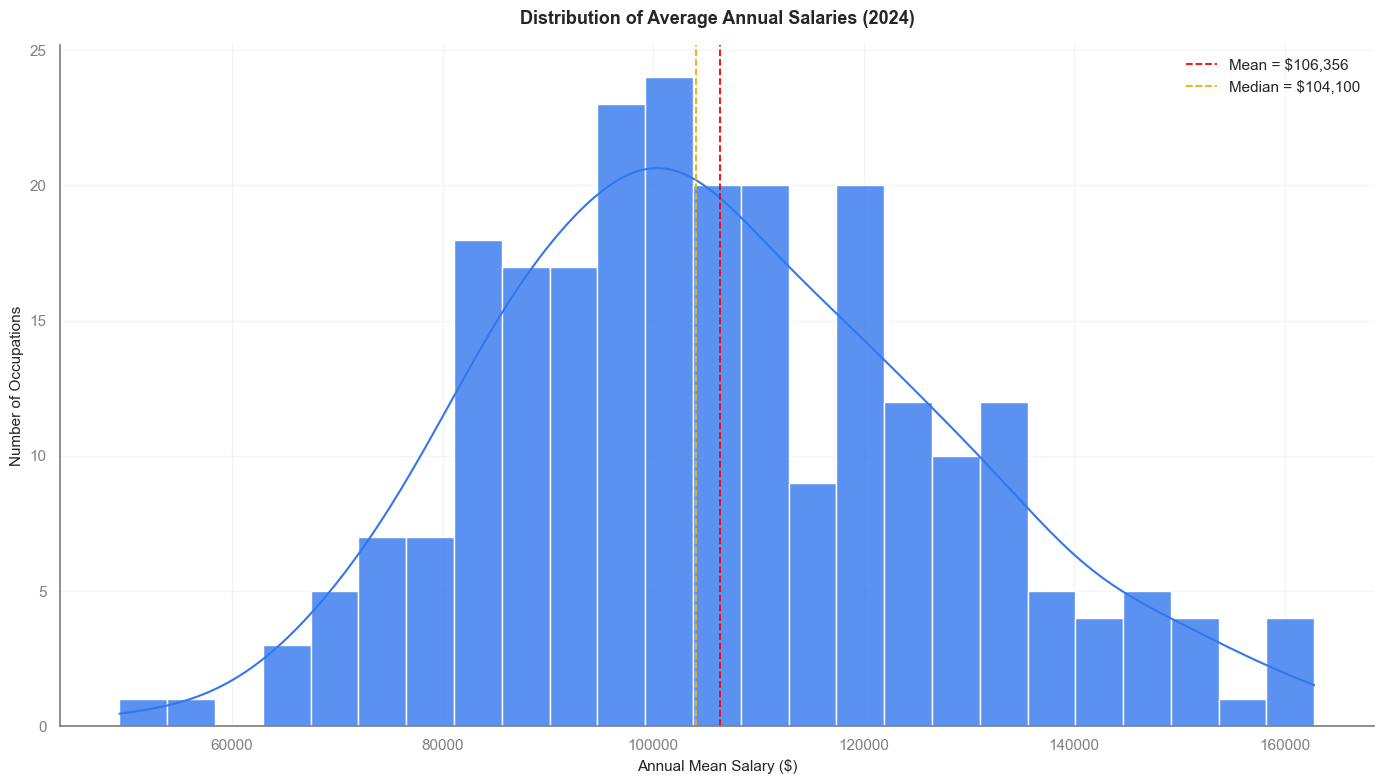

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(data_jobs_merged_df['a_mean_24'].dropna(), bins=25, kde=True,
             color="#3277ee", edgecolor='white', alpha=0.8)

mean_val = data_jobs_merged_df['a_mean_24'].mean()
median_val = data_jobs_merged_df['a_mean_24'].median()
plt.axvline(mean_val, color='red', linestyle='--', lw=1.3, label=f"Mean = ${mean_val:,.0f}")
plt.axvline(median_val, color='orange', linestyle='--', lw=1.3, label=f"Median = ${median_val:,.0f}")

plt.title("Distribution of Average Annual Salaries (2024)", pad=15, fontsize=13, weight='bold')
plt.xlabel("Annual Mean Salary ($)", fontsize=11)
plt.ylabel("Number of Occupations", fontsize=11)
plt.legend(frameon=False)
plt.grid(alpha=0.2)
ax = plt.gca() 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.tick_params(colors='grey')
plt.tight_layout()
plt.show()

This chart is a  summary of how data-related salaries distribute across occupations in 2024.
It’s roughly bell-shaped but leans slightly right — meaning most jobs fall around the $90k–$115k range, with a few high-paying outliers stretching beyond $150k.

You can see that the mean ($106k) is a bit higher than the median ($104k), which tells that a handful of top-earning roles (like architects or senior data scientists) are pulling the average up. In short — most data pros cluster around six-figure salaries, but there’s a long tail of very lucrative roles at the high end.

In [ ]:
data_jobs_merged_df.occ_title.unique()

array(['Database Administrators', 'Database Architects',
       'Operations Research Analysts', 'Statisticians', 'Data Scientists'],
      dtype=object)

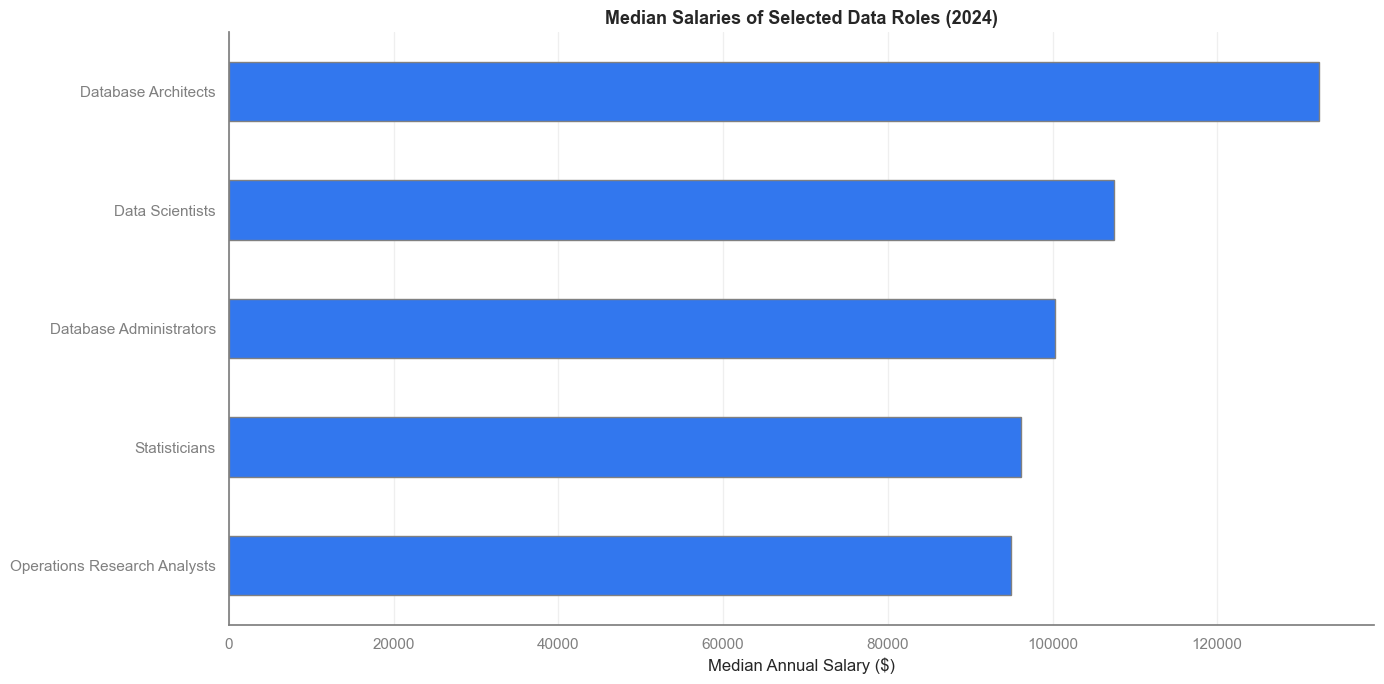

In [ ]:
selected_roles = data_jobs_merged_df.occ_title.unique()

subset = data_jobs_merged_df[data_jobs_merged_df['occ_title'].isin(selected_roles)]

# Order by median salary for visual clarity
order = subset.groupby('occ_title')['a_mean_24'].median().sort_values().index

median_salaries = (
    data_jobs_merged_df[data_jobs_merged_df['occ_title'].isin(selected_roles)]
    .groupby('occ_title')['a_mean_24']
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(14,7))
median_salaries.plot(kind='barh', color='#3277ee', edgecolor='grey')
plt.title("Median Salaries of Selected Data Roles (2024)", fontsize=13, weight='bold')
plt.xlabel("Median Annual Salary ($)")
plt.ylabel("")
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
ax = plt.gca() 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.tick_params(colors='grey')
plt.tight_layout()
plt.show()




This bar chart is pretty straightforward — it compares median salaries for data roles in 2024, and you can see the clear pay trend here.

Database Architects are sitting at the top, around $130K, making them the highest-paid among the group: not too surprising, since architecture jobs require to involve both technical design and infrastructure strategy. Data Scientists come next, slightly below, followed by Database Administrators and Statisticians, both hovering around the $95K–$100K range. Statisticians and Operations Research Analysts are the last ones, but still getting paid $90K average.

# Conclusion

Looking across these charts, it’s clear that “data” jobs are not all the same, both in pay and how they’re spread out across states. The distribution shows most roles floating around the $100K mark, but the top of the range pushes toward $150K+, mostly pulled by big tech states like California and Washington.

Among the roles, Database Architects lead all titles in this research, followed by Data Scientists, while Operations Research Analysts and Statisticians earn less, still solid, but not in the high reported jobs. The average salaries progression chart from 2021–2024 shows that salaries kept climbing, suggesting data skills stayed in demand.

When we map out states, the high-pay clusters line up almost perfectly with tech-heavy regions(states like CA, WA), finance centers (NY), and policy capitals (DC and Maryland). Lower tiers still offer data jobs, but the pay gap is real.

In short — data roles pay well, but the “where” and “what kind” matters a lot. It’s a reminder that not all data careers scale equally, but they all trend one way: up.